### Problem 7.2.1
**posterior_gdpInfantMortality.csv contains GDP per capita and infant mortality for a range of countries in 1998.**

Fit a model of the form:
\begin{equation}
M_i \sim \mathcal{N} \left( \alpha + \beta GDP_i, \sigma \right)
\end{equation}
Using a frequentist approach.

In [18]:
import pandas as pd

im = pd.read_csv('../data/posterior_gdpInfantMortality.csv')
im.columns = ['country', 'infant.mortality', 'gdp']
im = im.dropna()
print(im.head())
print(im.shape)

       country  infant.mortality     gdp
0  Afghanistan             154.0  2848.0
1      Albania              32.0   863.0
2      Algeria              44.0  1531.0
5       Angola             124.0   355.0
6      Antigua              24.0  6966.0
(193, 3)


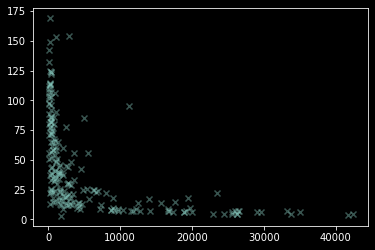

In [29]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
plt.scatter(im['gdp'], im['infant.mortality'], marker='x', alpha=0.4)

alpha = 0.03829540666598231 beta = [-1.48723847e-06] var = 1486.441116148532


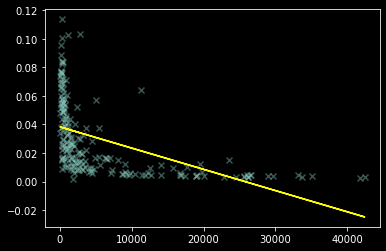

In [77]:
# Compute mean, std
from sklearn.linear_model import LinearRegression

# standardise data by estimating the variance
var = im['infant.mortality'].var()
standard = im['infant.mortality'] / var

lr = LinearRegression()
lr.fit(im['gdp'].values.reshape(-1,1), standard)

plt.scatter(im['gdp'], standard, marker='x', alpha=0.4)
plt.plot(im['gdp'], lr.predict(im['gdp'].values.reshape(-1,1)), color='yellow')
print('alpha =', lr.intercept_, 'beta =', lr.coef_, 'var =', var)

In [85]:
# Get MSE
from sklearn.metrics import mean_squared_error as mse
rmse = mse(lr.predict(im['gdp'].values.reshape(-1,1)), im['infant.mortality'], squared=False)
print(rmse)

58.28441188885353


0.5798840126815817


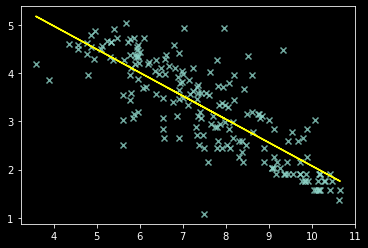

In [86]:
import numpy as np
l_gdp = np.log(im['gdp'])
l_mort = np.log(im['infant.mortality'])

# standardise data
var = l_mort.var()
l_mort = l_mort / var

lr = LinearRegression()
lr.fit(l_gdp.values.reshape(-1,1), normed)

plt.scatter(l_gdp, l_mort, marker='x', alpha=0.8)
plt.plot(l_gdp, lr.predict(l_gdp.values.reshape(-1,1)), color='yellow')

rmse = mse(lr.predict(l_gdp.values.reshape(-1,1)), l_mort, squared=False)
print(rmse)